<a href="https://www.kaggle.com/stevenslater/house-prices-with-gradient-boost-and-rf?scriptVersionId=84689656" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Predicting House Prices - Using Gradient Boosting and Random Forrest Classifiers

# **The steps that I have taken to for this task:**

# 1. EDA
# 2. Feature Egineering
# 3. Fitting the Models

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
        
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


**The first part of our EDA will be too look at the data we have, see the data types and see how many null values we have**

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**Can see clearly that in both the training and test datsets have a very large amount of null values in the columns - PoolQC, Fence, MiscFeature. As over 50% of their values are missing. I am going to drop these straight away as filling these with values will not help us.**

**I am also going do drop the ID from both as we do not need them right now, however will require the test ID at the end for submission.**

In [8]:
train = train.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)
testID = test.Id
#print(testID)
test = test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1)

# Now Lets take a look at correlations!
**Looking at correlations will help us see what features are going to be most impoortant in our model.**

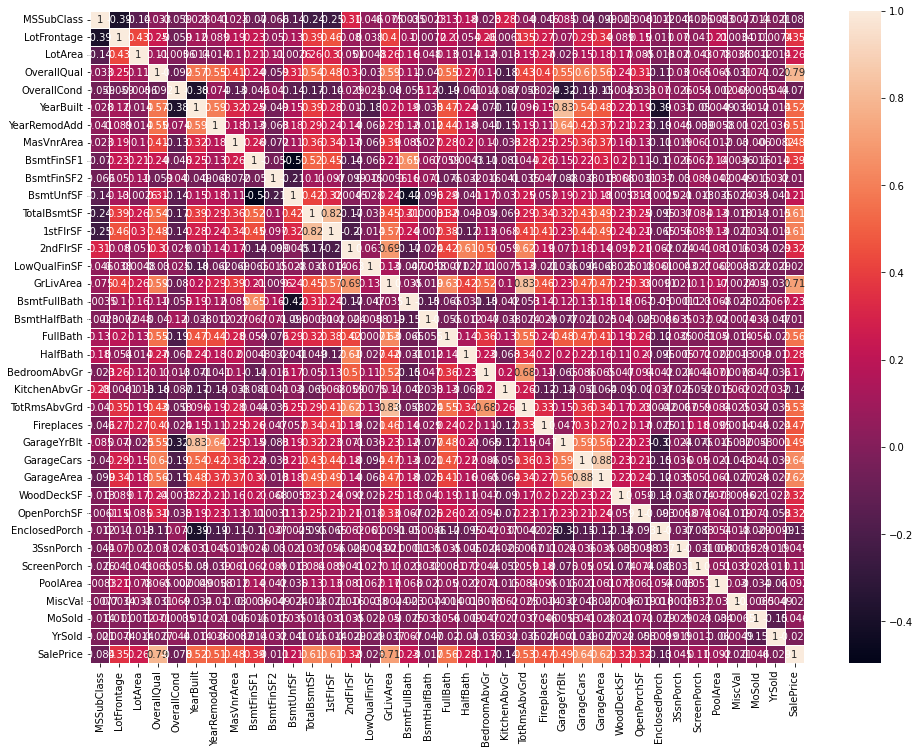

In [9]:
corr = train.corr()
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr,linewidths=.5,annot=True)

**Now lets refine this graph so we can see it clearer and look at correlations with a strong correlation with sale price.**

<AxesSubplot:>

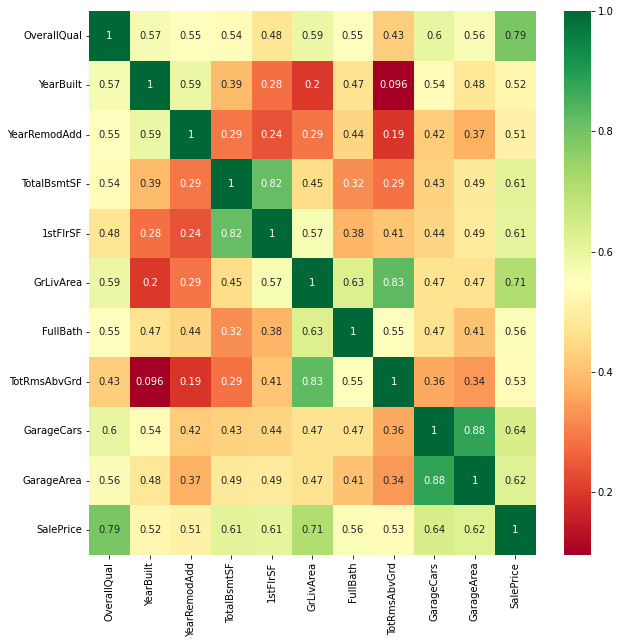

In [10]:
corr = train.corr()
strong_corr = corr.index[abs(corr["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
sns.heatmap(train[strong_corr].corr(),annot=True,cmap="RdYlGn")

**As we can see by lookoing above, some variables themselves are highly correlated, such as GarageCars and Garage Area - this can be detrimnetal to our model if two features are correlated themselves.**

**Below I will plot some of these so we can get a better look into how they are correlated, some have been left out for the reasons stated above**

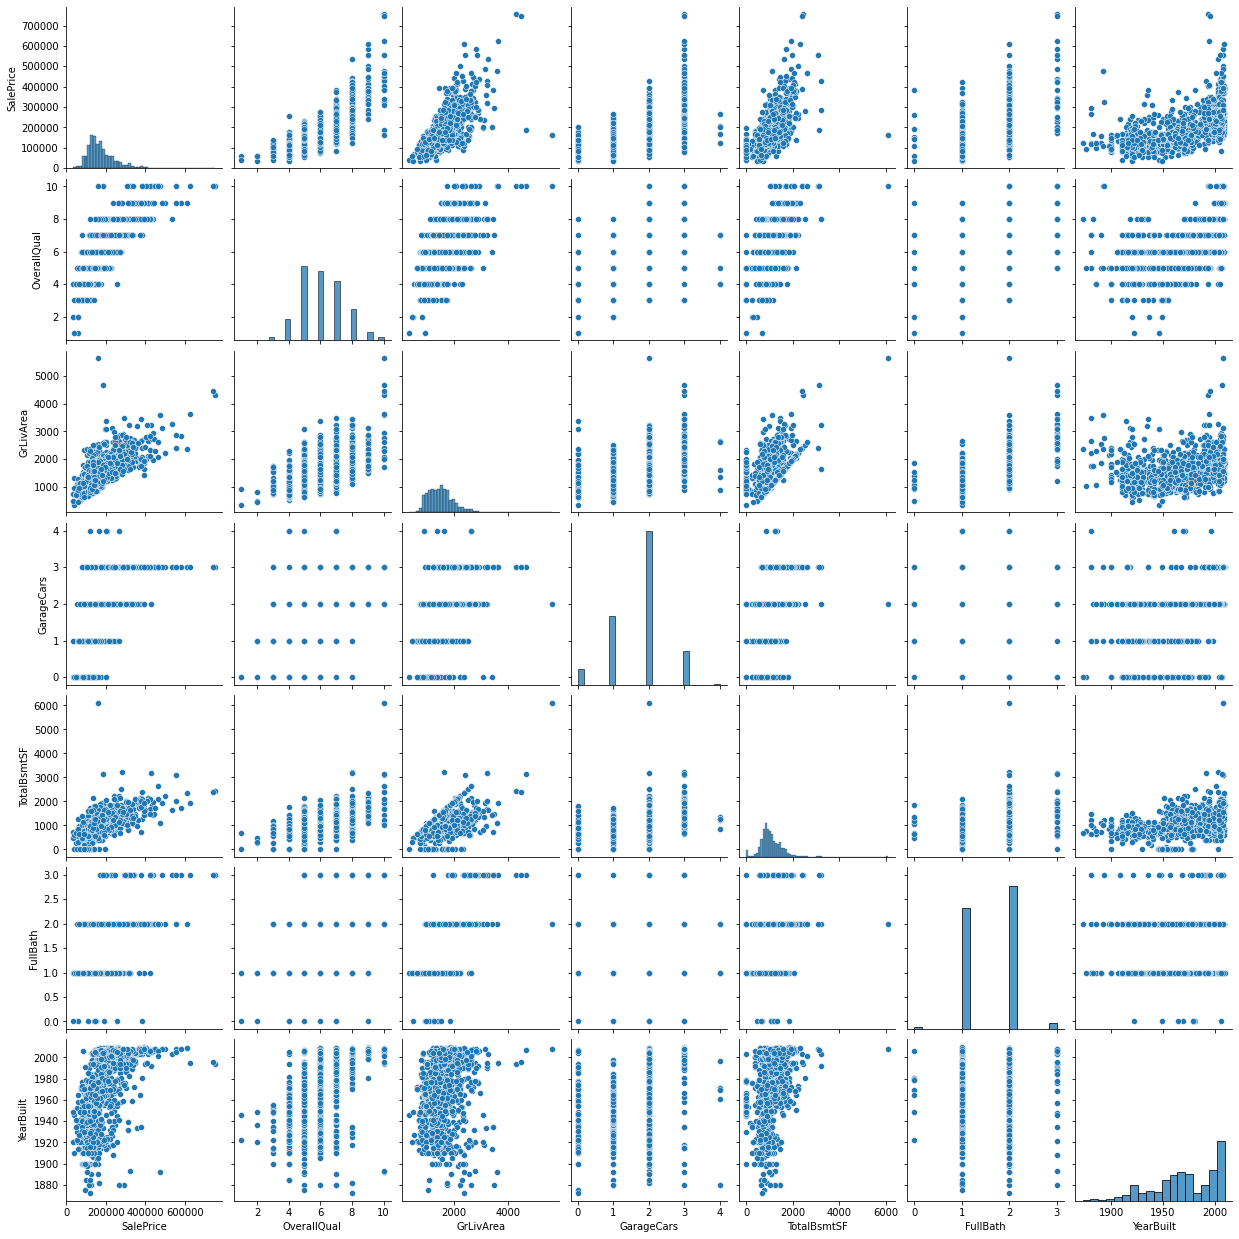

In [11]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
#Have not chosen them all, as you can see from above that some columns are highly correlatd with one another such as GarageCars and GarageArea, so will only use one of them.
sns.pairplot(train[cols], height = 2.5)

# Lets Investigate are target variable : Sale Price

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

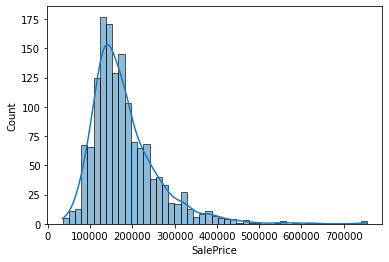

In [12]:
sns.histplot(train.SalePrice,kde=True)

In [13]:
from scipy.stats import skew
skew(train.SalePrice)

1.880940746034036

**As we can see, sale price is not normally distributed, the models that we will be using here will work better with niormally distributed data, so in iorder to fix this we will use numpy to log transform this variable**

**Below you will also see me combine both testing and training data, I add a new column to help differentiate this**

In [14]:
#LOG OF SALE PRICE
#DROP SALE PRICE BUT SAVE IT 
#CONCATENATE TWO DATAFRAMES BUT ADD COLUMN TRAIN
train['train']  = 1
test['train']  = 0
all_data = pd.concat([train, test], axis=0,sort=False)

train.SalePrice = np.log1p(train.SalePrice)
#print(all_data.head())

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

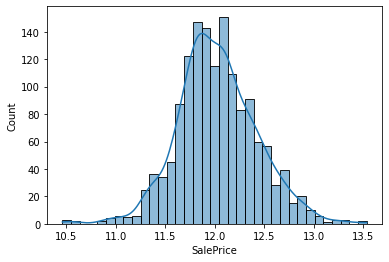

In [15]:
#Lets have a look at sale price now
sns.histplot(train.SalePrice,kde=True)

**Now it looks more normally distributed!**

# We are now going to plot some graphs to understand more about our dataset

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

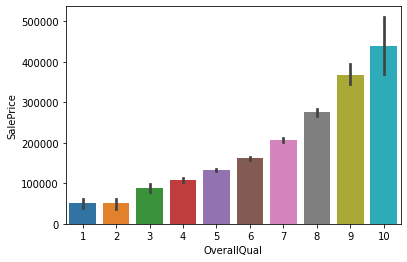

In [16]:
sns.barplot(x=all_data.OverallQual,y=all_data.SalePrice)

Can see very linear pattern between these two variables - this visualsation could have been predicted from the strong correlation value we were given earlier.

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

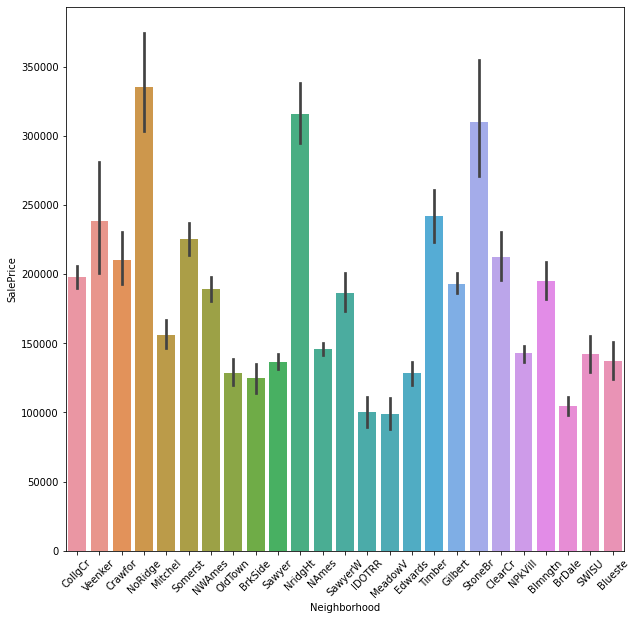

In [17]:
#does the neighbourhood effect price
plt.figure(figsize=(10,10))
plt.xticks(rotation = 45)
sns.barplot(x=all_data.Neighborhood,y=all_data.SalePrice)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

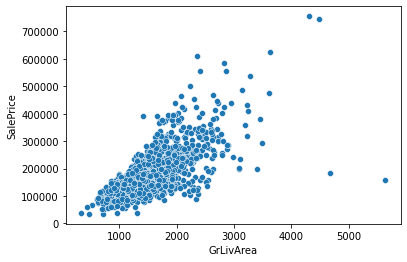

In [18]:
#GrLiving area is the area above ground in square feet.
sns.scatterplot(x=all_data.GrLivArea,y=all_data.SalePrice)

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

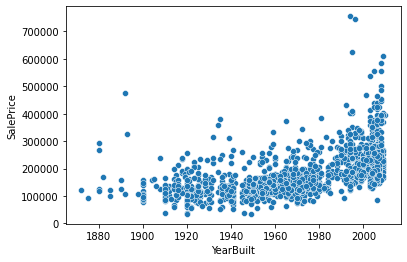

In [19]:
#are modern houses going for more or less?
sns.scatterplot(x=all_data.YearBuilt,y=all_data.SalePrice)

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

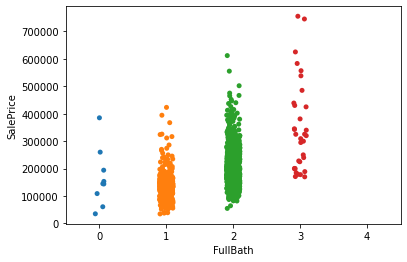

In [20]:
#number of bathrooms imply bigger house?
sns.stripplot(x=all_data.FullBath,y=all_data.SalePrice)

**Now we split our data intio numerical and categorical data to understand and pre-process both independently, before combining to use in our model.**

In [21]:
#Dropping but saving the SalePrice for later Use as it is the dependent variable
salePrice = train.SalePrice
all_data = all_data.drop(['SalePrice'],axis=1)

cat = all_data.select_dtypes(include=['object'])
num = all_data.select_dtypes(exclude=['object'])
#print(all_data)
#print(cat.columns)

In [22]:
#Lets See how many they are
print("There are " + str(num.shape[1]) + " numerical values")
print("There are " + str(cat.shape[1]) + " categorical values")

There are 37 numerical values
There are 39 categorical values


**Now lets look at some of these categorical variables**

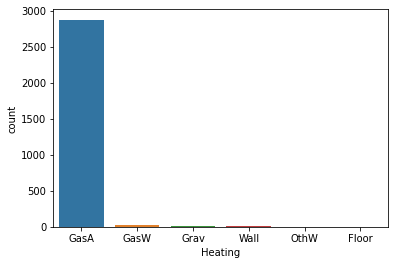

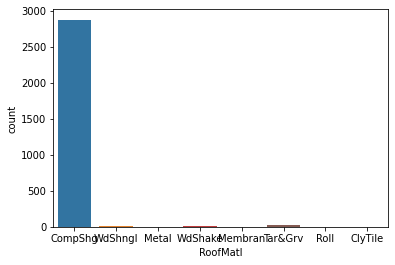

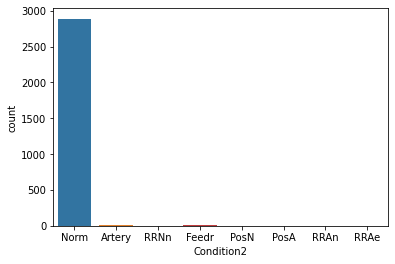

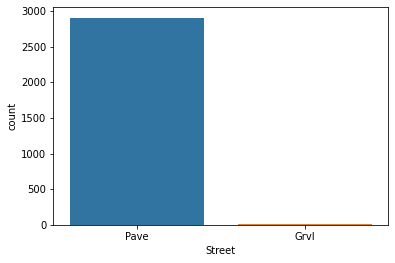

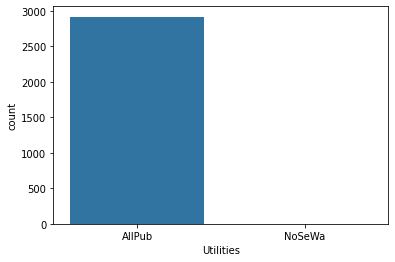

In [23]:
#for i in cat.columns:
#    plt.figure()
#    sns.countplot(x=cat[i])

#After carrying out the previous code it is clear that some of the variables have an extremely low variance - and should be dropped from the dataset, these columns are:

#'Heating','RoofMatl','Condition2','Street','Utilities'

cols = ['Heating','RoofMatl','Condition2','Street','Utilities']
for i in cols:
    plt.figure()
    sns.countplot(x=cat[i])

**We do not need the columns above due to their extremley high variance - these could affect our model as it may weigh certain features higher due to coincidences, as the majority of these features take on the same value.**

In [24]:
cat = cat.drop(['Heating','RoofMatl','Condition2','Street','Utilities'],axis=1)

**Now lets look at our numerical data**.

In [25]:
print(num.columns)
print(num.shape[1])

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'train'],
      dtype='object')
37


**Here we are going to use are list of strongly correlated features from earlier to plot and get and idea of some of our numerical variables**

11


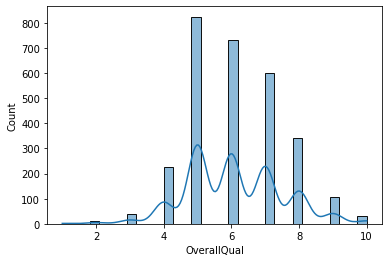

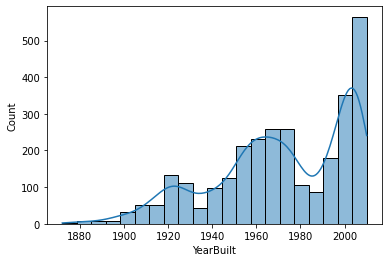

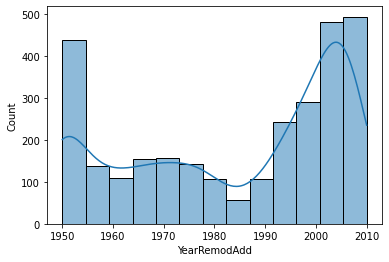

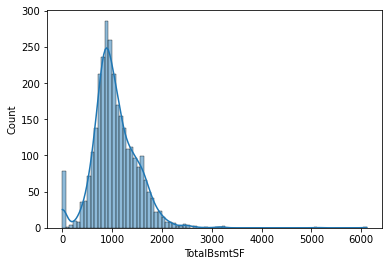

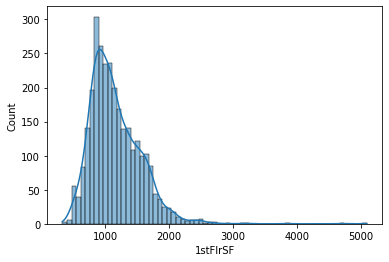

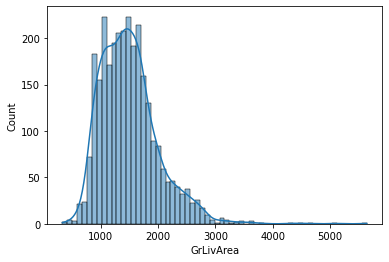

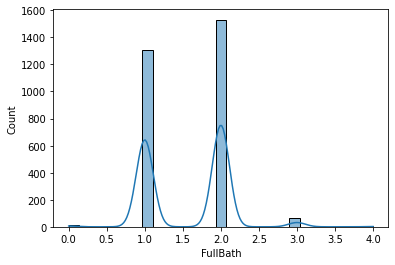

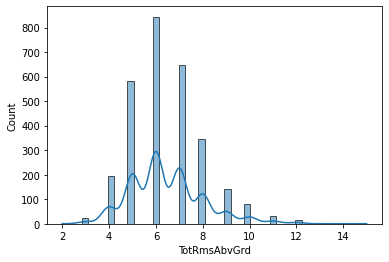

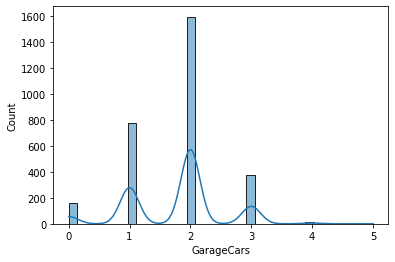

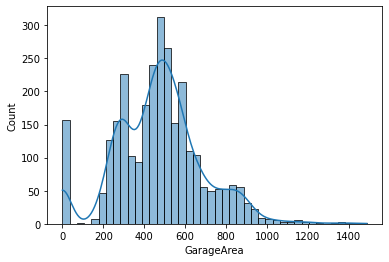

In [26]:
print(len(strong_corr))

#plotting the top correlated values, only doing first 10 as the last one is sale price which has now been removed.
for i in range(10):
    plt.figure()
    sns.histplot(num[strong_corr[i]],kde=True)

**We see here that some of these are skewed, we will fix this in feature egineering.**

# First lets fix null values

In [27]:
#Lets look at Categorical First
#cat.info()
#Lets look at how many null values there are
for i in cat.columns:
    print(str(i) + ' has ' + str(cat[i].isnull().sum()) + ' null values')

MSZoning has 4 null values
LotShape has 0 null values
LandContour has 0 null values
LotConfig has 0 null values
LandSlope has 0 null values
Neighborhood has 0 null values
Condition1 has 0 null values
BldgType has 0 null values
HouseStyle has 0 null values
RoofStyle has 0 null values
Exterior1st has 1 null values
Exterior2nd has 1 null values
MasVnrType has 24 null values
ExterQual has 0 null values
ExterCond has 0 null values
Foundation has 0 null values
BsmtQual has 81 null values
BsmtCond has 82 null values
BsmtExposure has 82 null values
BsmtFinType1 has 79 null values
BsmtFinType2 has 80 null values
HeatingQC has 0 null values
CentralAir has 0 null values
Electrical has 1 null values
KitchenQual has 1 null values
Functional has 2 null values
FireplaceQu has 1420 null values
GarageType has 157 null values
GarageFinish has 159 null values
GarageQual has 159 null values
GarageCond has 159 null values
PavedDrive has 0 null values
SaleType has 1 null values
SaleCondition has 0 null valu

**Looking at the data description provided allows us to know how to handle null values for certain features**

In [28]:
#From looking at the data description we can fill some of these values in already.

#If null then it has no fireplace
#MasVnrType and Functional have the following values if null from data description
cat['FireplaceQu'] = cat['FireplaceQu'].fillna('None')
cat['MasVnrType'] = cat['MasVnrType'].fillna('None')
cat['Functional'] = cat['Functional'].fillna('Typ')

#If null then no garage
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        cat[col] = cat[col].fillna('None')

#If null then no basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
        cat[col] = cat[col].fillna('None')


# Replace the missing values in each of the columns below with their mode
cat['Electrical'] = cat['Electrical'].fillna("SBrkr")
cat['KitchenQual'] = cat['KitchenQual'].fillna("TA")
cat['Exterior1st'] = cat['Exterior1st'].fillna(cat['Exterior1st'].mode()[0])
cat['Exterior2nd'] = cat['Exterior2nd'].fillna(cat['Exterior2nd'].mode()[0])
cat['SaleType'] = cat['SaleType'].fillna(cat['SaleType'].mode()[0])
cat['MSZoning'] = cat['MSZoning'].fillna(cat['MSZoning'].mode()[0])

**We can now see how many nulls are left**

In [29]:
#Now lets see how many null values remain.
for i in cat.columns:
    print(str(i) + ' has ' + str(cat[i].isnull().sum()) + ' null values')

MSZoning has 0 null values
LotShape has 0 null values
LandContour has 0 null values
LotConfig has 0 null values
LandSlope has 0 null values
Neighborhood has 0 null values
Condition1 has 0 null values
BldgType has 0 null values
HouseStyle has 0 null values
RoofStyle has 0 null values
Exterior1st has 0 null values
Exterior2nd has 0 null values
MasVnrType has 0 null values
ExterQual has 0 null values
ExterCond has 0 null values
Foundation has 0 null values
BsmtQual has 0 null values
BsmtCond has 0 null values
BsmtExposure has 0 null values
BsmtFinType1 has 0 null values
BsmtFinType2 has 0 null values
HeatingQC has 0 null values
CentralAir has 0 null values
Electrical has 0 null values
KitchenQual has 0 null values
Functional has 0 null values
FireplaceQu has 0 null values
GarageType has 0 null values
GarageFinish has 0 null values
GarageQual has 0 null values
GarageCond has 0 null values
PavedDrive has 0 null values
SaleType has 0 null values
SaleCondition has 0 null values


**We now repeat this process for numerical data**

In [30]:
#Now for filling in numerical data
#num.info()
#Lets look at how many null values there are
for i in num.columns:
    print(str(i) + ' has ' + str(num[i].isnull().sum()) + ' null values')

MSSubClass has 0 null values
LotFrontage has 486 null values
LotArea has 0 null values
OverallQual has 0 null values
OverallCond has 0 null values
YearBuilt has 0 null values
YearRemodAdd has 0 null values
MasVnrArea has 23 null values
BsmtFinSF1 has 1 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
1stFlrSF has 0 null values
2ndFlrSF has 0 null values
LowQualFinSF has 0 null values
GrLivArea has 0 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
FullBath has 0 null values
HalfBath has 0 null values
BedroomAbvGr has 0 null values
KitchenAbvGr has 0 null values
TotRmsAbvGrd has 0 null values
Fireplaces has 0 null values
GarageYrBlt has 159 null values
GarageCars has 1 null values
GarageArea has 1 null values
WoodDeckSF has 0 null values
OpenPorchSF has 0 null values
EnclosedPorch has 0 null values
3SsnPorch has 0 null values
ScreenPorch has 0 null values
PoolArea has 0 null values
MiscVal has 0 null values
MoSol

In [31]:
#no garage then 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
        num[col] = num[col].fillna(0)

#plt.hist(num.LotFrontage)
#Plotting lot frontage to see whehter to fill with mean or median
#As it is skewed we are going to replace it with the median.
num['LotFrontage'] = num['LotFrontage'].fillna(num['LotFrontage'].median())

#fill the rests with 0
for col in ('BsmtHalfBath', 'BsmtFullBath','TotalBsmtSF','BsmtUnfSF','BsmtFinSF2','BsmtFinSF1','MasVnrArea'):
    num[col] = num[col].fillna(0)


In [32]:
#Lets see how many null values remain
for i in num.columns:
    print(str(i) + ' has ' + str(num[i].isnull().sum()) + ' null values')

MSSubClass has 0 null values
LotFrontage has 0 null values
LotArea has 0 null values
OverallQual has 0 null values
OverallCond has 0 null values
YearBuilt has 0 null values
YearRemodAdd has 0 null values
MasVnrArea has 0 null values
BsmtFinSF1 has 0 null values
BsmtFinSF2 has 0 null values
BsmtUnfSF has 0 null values
TotalBsmtSF has 0 null values
1stFlrSF has 0 null values
2ndFlrSF has 0 null values
LowQualFinSF has 0 null values
GrLivArea has 0 null values
BsmtFullBath has 0 null values
BsmtHalfBath has 0 null values
FullBath has 0 null values
HalfBath has 0 null values
BedroomAbvGr has 0 null values
KitchenAbvGr has 0 null values
TotRmsAbvGrd has 0 null values
Fireplaces has 0 null values
GarageYrBlt has 0 null values
GarageCars has 0 null values
GarageArea has 0 null values
WoodDeckSF has 0 null values
OpenPorchSF has 0 null values
EnclosedPorch has 0 null values
3SsnPorch has 0 null values
ScreenPorch has 0 null values
PoolArea has 0 null values
MiscVal has 0 null values
MoSold has

Now lets look into skewed data and fix that!

# Feature egineering time!

In [33]:
#total surface area = TotalbsmtSF + 1stFlrSF + 2ndFlrSf
#Total bnathrooms = fullbath + 0.5*halfbath + bsmtfullbath + 0.5*bsmthalfbath
#Overall = overallqual + overallCond
num['TotalSF'] = num['TotalBsmtSF'] + num['1stFlrSF'] + num['2ndFlrSF']
num['Total_Home_Quality'] = num['OverallQual'] + num['OverallCond']
num['Total_Bathrooms'] = (num['FullBath'] + (0.5 * num['HalfBath']) +
                               num['BsmtFullBath'] + (0.5 * num['BsmtHalfBath']))

num['haspool'] = num['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
num['has2ndfloor'] = num['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
num['hasgarage'] = num['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
num['hasbsmt'] = num['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
num['hasfireplace'] = num['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

**Now lets encoide our cateogrical data**

In [34]:
cat = pd.get_dummies(cat)
#print(cat)
print(cat.shape)

(2919, 223)


# Fixing skewed data

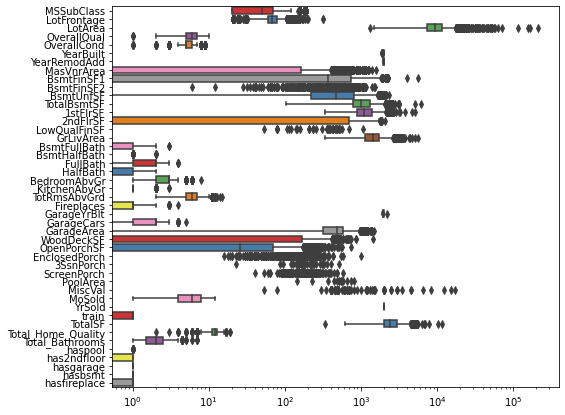

In [35]:
#Lets look at how skewed our data is on a box plot.
#original plot is too skewed to see so we will scale it down!
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=num , orient="h", palette="Set1")

In [36]:
#Lets look at the skew values
skew_features = num.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features.apply(lambda x: abs(x) > 0.5)
high_skew = high_skew[high_skew == True]
print(high_skew)

MiscVal               True
PoolArea              True
haspool               True
LotArea               True
LowQualFinSF          True
3SsnPorch             True
KitchenAbvGr          True
BsmtFinSF2            True
EnclosedPorch         True
ScreenPorch           True
BsmtHalfBath          True
MasVnrArea            True
OpenPorchSF           True
WoodDeckSF            True
LotFrontage           True
TotalSF               True
1stFlrSF              True
BsmtFinSF1            True
MSSubClass            True
GrLivArea             True
TotalBsmtSF           True
BsmtUnfSF             True
2ndFlrSF              True
TotRmsAbvGrd          True
Fireplaces            True
HalfBath              True
BsmtFullBath          True
OverallCond           True
Total_Home_Quality    True
YearBuilt             True
GarageYrBlt           True
hasgarage             True
hasbsmt               True
dtype: bool


In [37]:
#dont want to transform our new feature egineered cols that fall under being highly skewed
transform_cols = [x for x in high_skew.index if x not in ['hasgarage','hasbsmt','haspool']]
#print(transform_cols)

for i in transform_cols:
    num[i] = np.log1p(num[i])

print(num.head())


   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7     1.791759   7.602900   
1    3.044522     4.394449  9.169623            6     2.197225   7.589336   
2    4.110874     4.234107  9.328212            7     1.791759   7.601902   
3    4.262680     4.110874  9.164401            7     1.791759   7.557995   
4    4.110874     4.442651  9.565284            8     1.791759   7.601402   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  YrSold  train  \
0          2003    5.283204    6.561031         0.0  ...    2008      1   
1          1976    0.000000    6.886532         0.0  ...    2007      1   
2          2002    5.093750    6.188264         0.0  ...    2008      1   
3          1970    0.000000    5.379897         0.0  ...    2006      1   
4          2000    5.860786    6.486161         0.0  ...    2008      1   

    TotalSF  Total_Home_Quality  Total_Bathrooms  haspool  has2ndfloor  \
0  7.850493 

# Putting back together and making Test and Train

In [38]:
#Lets put our numerical and categorical data back together
num.shape,cat.shape
data = pd.concat([num, cat], axis=1,sort=False)
data.shape,num.shape,cat.shape
data.shape
print(data.head())

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    4.110874     4.189655  9.042040            7     1.791759   7.602900   
1    3.044522     4.394449  9.169623            6     2.197225   7.589336   
2    4.110874     4.234107  9.328212            7     1.791759   7.601902   
3    4.262680     4.110874  9.164401            7     1.791759   7.557995   
4    4.110874     4.442651  9.565284            8     1.791759   7.601402   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0          2003    5.283204    6.561031         0.0  ...               0   
1          1976    0.000000    6.886532         0.0  ...               0   
2          2002    5.093750    6.188264         0.0  ...               0   
3          1970    0.000000    5.379897         0.0  ...               0   
4          2000    5.860786    6.486161         0.0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0          

In [39]:
#Split these into our test and train
train_Y = salePrice
train_X = data[data.train == 1]
test_X = data[data.train == 0]
#test_X.shape
train_X = train_X.drop(['train'],axis=1)
test_X = test_X.drop(['train'],axis=1)
#drop train column in both

# **MODEL**

**Here I use a gradient boosting regressor and a random forrest**
**Tuning the hyper paramters was something I have had trouble understanding 100% but after reading and watching content on it and playing around with them for a while it seems to be good.**
**However could be improved.**

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=8,#only changing this to 8 got a score of 0.12272
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=1200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

In [41]:
print(train_X)
gbr.fit(train_X, train_Y)
rf.fit(train_X, train_Y)

      MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       4.110874     4.189655  9.042040            7     1.791759   7.602900   
1       3.044522     4.394449  9.169623            6     2.197225   7.589336   
2       4.110874     4.234107  9.328212            7     1.791759   7.601902   
3       4.262680     4.110874  9.164401            7     1.791759   7.557995   
4       4.110874     4.442651  9.565284            8     1.791759   7.601402   
...          ...          ...       ...          ...          ...        ...   
1455    4.110874     4.143135  8.976894            6     1.791759   7.600902   
1456    3.044522     4.454347  9.486152            6     1.945910   7.590347   
1457    4.262680     4.204693  9.109746            7     2.302585   7.571474   
1458    3.044522     4.234107  9.181735            5     1.945910   7.576097   
1459    3.044522     4.330733  9.204121            5     1.945910   7.583756   

      YearRemodAdd  MasVnrArea  BsmtFin

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=1200, oob_score=True,
                      random_state=42)

In [42]:
predictions = gbr.predict(test_X)
predictions = np.expm1(predictions) 
predictions = predictions.round(0)
print(predictions)

#predictions2 = rf.predict(test_X)
#predictions2 = np.expm1(predictions2)
#predictions2 = predictions2.round(0)
#print(predictions2)

[124619. 157784. 185152. ... 159803. 116888. 218336.]


In [43]:
#Submission
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.Id = testID
submission.SalePrice = predictions
submission.head()
submission.to_csv("submission.csv", index=False)